In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Data Preparation

In [2]:
#Loading Training data
df_input = pd.read_csv('/Users/pk/Desktop/Hardwork Pays Off Challenge/Training Data/Linear_X_Train.csv')
df_output= pd.read_csv('/Users/pk/Desktop/Hardwork Pays Off Challenge/Training Data/Linear_Y_Train.csv')

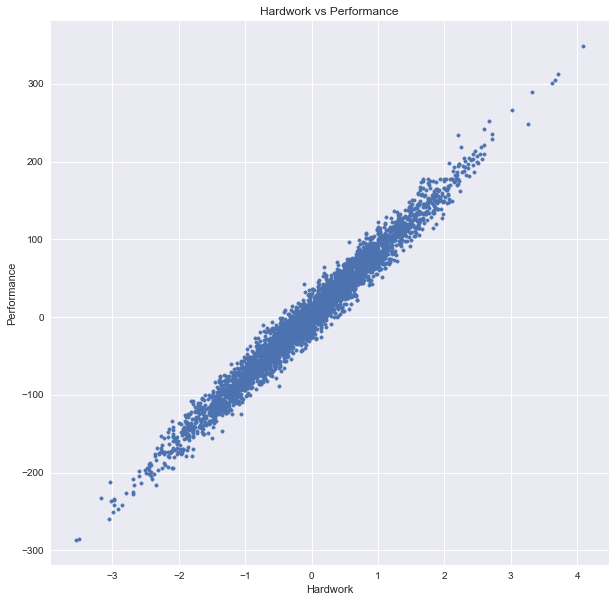

In [3]:
#concatenating input and output to a single dataframe and visualisation
df=pd.concat([df_input,df_output],axis=1)
x_array= df_input.values
y_array=df_output.values
plt.style.use('seaborn')
plt.figure(figsize=(10,10))
plt.scatter(x_array,y_array,marker='.')
plt.title('Hardwork vs Performance')
plt.xlabel('Hardwork')
plt.ylabel('Performance')
plt.show()


In [4]:
#Check if normalisation is required in data
u= x_array.mean()
sigma_x=x_array.std()
u,sigma_x

(-0.03779466168006855, 0.9920801322508517)

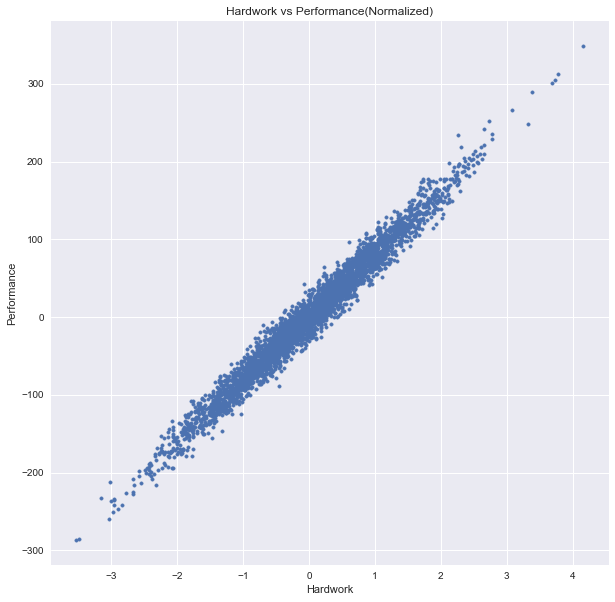

In [5]:
#data normalisation
x_array= (x_array-u)/sigma_x
plt.figure(figsize=(10,10))
plt.scatter(x_array,y_array,marker='.')
plt.title('Hardwork vs Performance(Normalized)')
plt.xlabel('Hardwork')
plt.ylabel('Performance')
plt.show()

# Applying Linear Regression

In [13]:
def Hypothesis(theta,x):
    y_pred= theta[0]+(x*theta[1])
    return y_pred
def gradient(x,y,theta):
    m=x.shape[0]
    y_pred= Hypothesis(theta,x)
    diff= (y_pred-y)
    error=np.sum(diff**2)/m
    grad= np.zeros((2,))
    grad[0]=(2/m)*np.sum(diff)
    grad[1]=(2/m)*np.sum(np.multiply(diff,x))
    
    return grad,error
def graphError(error_list):
    plt.plot(error_list)
    plt.ylabel("Mean Squared Error")
    plt.xlabel("Epochs")
    plt.title('MSE per epoch')
    plt.show()
def gradient_descent(x,y,theta,maxSteps=100,learningrate=0.1):
    error_list=[]
    #theta=np.zeros((2,))
    for i in range(maxSteps):
        grad,error= gradient(x,y,theta)
        error_list.append(error)
        theta[0]= theta[0]-learningrate*grad[0]
        theta[1]= theta[1]-learningrate*grad[1]
    graphError(error_list)  
    #print(error_list)
    return theta

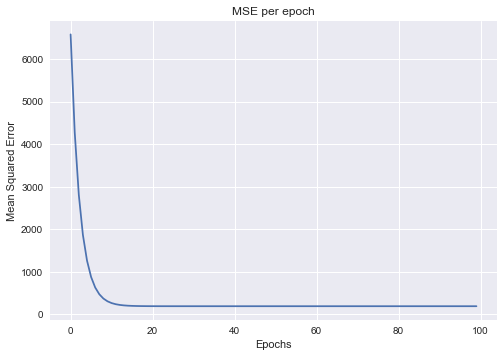

Parameter of line are [0.6838689678762822, 79.9057369262227]


In [15]:
theta=[0.0,0.0]
theta= gradient_descent(x_array,y_array,theta,100,0.1)
print("Parameter of line are", theta)


# PLOTTING THE REGRESSION LINE

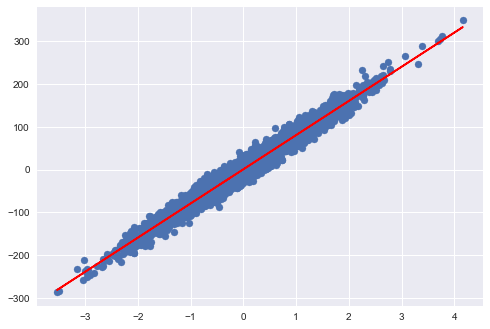

In [16]:
plt.scatter(x_array,y_array)

out=x_array*theta[1]+theta[0]
plt.plot(x_array,out,color='r')
plt.show()


# predictions on test data

In [23]:
x_test= pd.read_csv('./Test Cases/Linear_X_Test.csv')
y_test= Hypothesis(theta,x_test)
print(y_test)
prediction_df= pd.DataFrame(np.array(y_test),columns=['y'])
prediction_df.to_csv('predictions.csv',index=False)

               x
0    -149.374663
1     -68.756767
2    -201.492222
3     221.240119
4      47.908170
...          ...
1245  -12.744968
1246   75.173799
1247   10.912428
1248  -21.532930
1249  -53.686026

[1250 rows x 1 columns]


# scoring on the training data (R2 SCORE)

In [32]:
def R2Score(y_array,out):
    num= np.sum((y_array-out)**2)
    den= np.sum((y_array-np.mean(y_array))**2)
    return (1-num/den)*100

In [33]:
R2Score(y_array,out)

97.09612233822354